# problem statement

### Hypothesis Generation

In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Understanding/data collection

In [2]:
df=pd.read_csv('iris.data',names=['sepal_len','sepal_width','petal_len',
                                 'petal_width','class'])
# collected this data from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df_=df # backup plan for dataset

In [3]:
df.columns

Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class'], dtype='object')

In [4]:
df.head(3)

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# Data Preparation/Data cleaning/Wrangling
### data summarization
### feature Engineering/EDA(Univariate,Bivariate,Multivariate)

In [5]:
df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

sepal_len      0
sepal_width    0
petal_len      0
petal_width    0
class          0
dtype: int64

In [7]:
df.describe()
# statistical summary of numerical features.

,sepal_len,sepal_width,petal_len,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.select_dtypes('object')

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
df.isnull()

,sepal_len,sepal_width,petal_len,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


#### EDA

###### explore sepal_len

In [11]:
df.sepal_len.dtype

dtype('float64')

In [12]:
df.sepal_len.isnull().sum()

0

In [13]:
df.sepal_len.is_unique

False

In [14]:
df.sepal_len.nunique

<bound method IndexOpsMixin.nunique of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_len, Length: 150, dtype: float64>

<AxesSubplot:xlabel='sepal_len', ylabel='Density'>

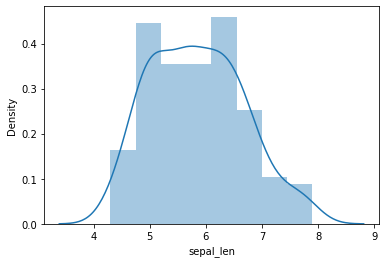

In [15]:
sns.distplot(df.sepal_len)

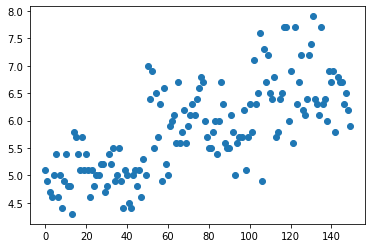

In [16]:
plt.scatter(df.index,df.sepal_len)

<AxesSubplot:ylabel='sepal_len'>

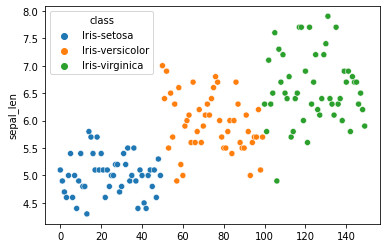

In [17]:
sns.scatterplot(df.index,df.sepal_len,hue=df['class'])

Text(0, 0.5, 'Sepal_Length')

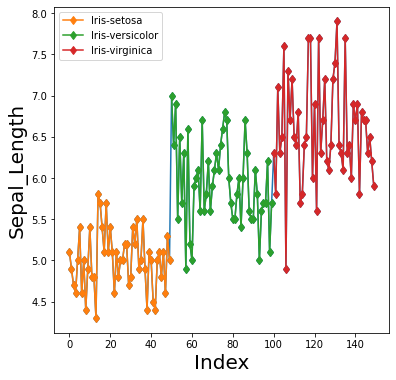

In [18]:
plt.figure(figsize=(6,6))
plt.plot(df.index,df.sepal_len,markevery=1,marker='d')
for name,group in df.groupby('class'):
    plt.plot(group.index,group.sepal_len,label=name,markevery=1,marker='d')
plt.legend()
plt.xlabel('Index',fontsize=20)
plt.ylabel('Sepal_Length',fontsize=20)

<AxesSubplot:xlabel='class', ylabel='sepal_len'>

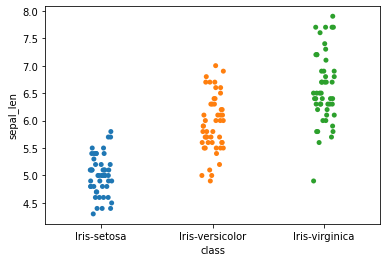

In [19]:
sns.stripplot(df['class'],df.sepal_len)

<AxesSubplot:xlabel='sepal_len'>

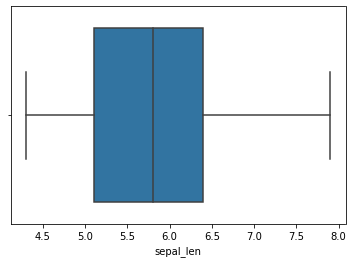

In [20]:
sns.boxplot(df.sepal_len)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f85634e0f10>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f85634e0dc0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f85634ef430>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f85634ef760>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f85634efa90>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f85634efdc0>}

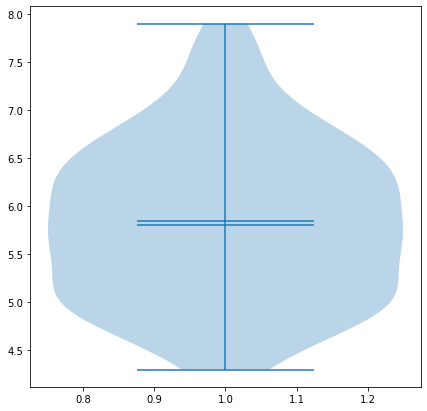

In [21]:
plt.figure(figsize=(7,7))
plt.violinplot(df.sepal_len,showmedians=True,showmeans=True)

<AxesSubplot:xlabel='sepal_len'>

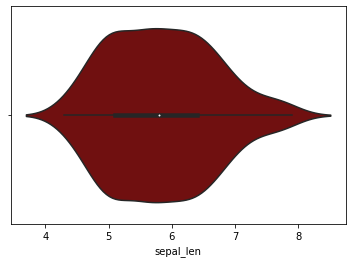

In [22]:
sns.violinplot(df.sepal_len,orient='vertical',color='maroon')

###### explore sepal_width

In [23]:
df.sepal_width.dtype

dtype('float64')

In [24]:
df.sepal_width.isnull().sum()

0

In [25]:
df.sepal_width.is_unique

False

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

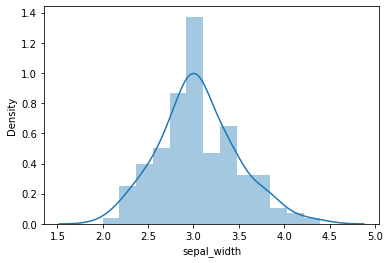

In [26]:
sns.distplot(df.sepal_width,)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8563355550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8563355c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85633551c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f856335d3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f856335d760>],
 'means': []}

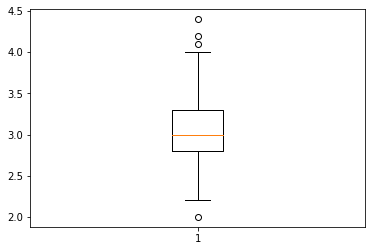

In [27]:
plt.boxplot(df.sepal_width)

<AxesSubplot:xlabel='sepal_width'>

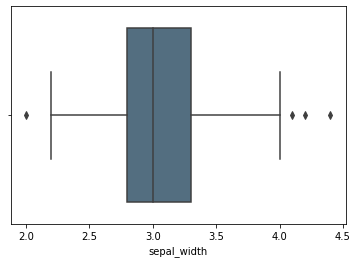

In [28]:
sns.boxplot(df.sepal_width,saturation=.3,orient='vertical')

<AxesSubplot:xlabel='sepal_width'>

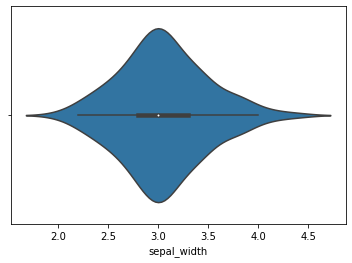

In [29]:
sns.violinplot(df.sepal_width)

In [30]:
df.sepal_width.min()

2.0

In [31]:
df.sepal_width.max()

4.4

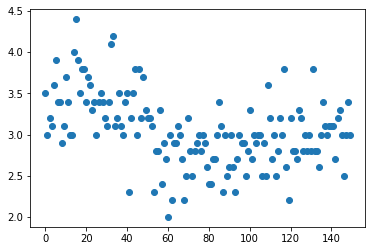

In [32]:
plt.scatter(df.index,df.sepal_width,)

<AxesSubplot:ylabel='sepal_width'>

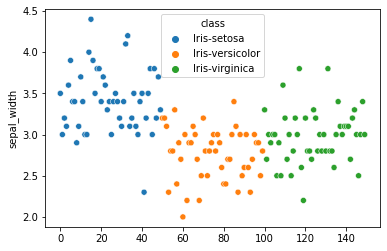

In [33]:
sns.scatterplot(df.index,df.sepal_width,hue=df['class'])

###### explore petal_len

In [34]:
df.petal_len.dtype

dtype('float64')

In [35]:
df.petal_len.isnull().sum()

0

In [36]:
print('mean: ',np.mean(df.petal_len))
print('median: ',df.petal_len.median())
print('max: ',df.petal_len.max())
print('min: ',df.petal_len.min())
np.percentile(df.petal_len,[25,50,75])

mean:  3.758666666666666
median:  4.35
max:  6.9
min:  1.0


array([1.6 , 4.35, 5.1 ])

<AxesSubplot:xlabel='petal_len', ylabel='Density'>

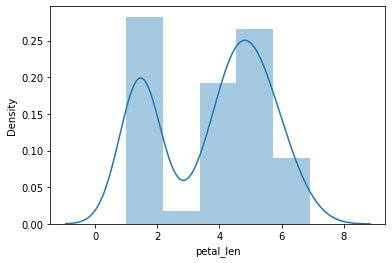

In [37]:
sns.distplot(df.petal_len,)

<AxesSubplot:xlabel='petal_len'>

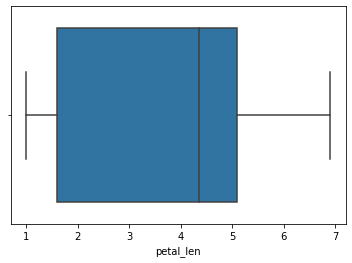

In [38]:
sns.boxplot(df.petal_len)

<AxesSubplot:xlabel='class', ylabel='petal_len'>

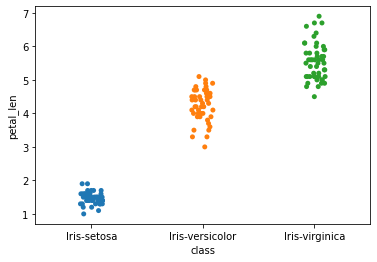

In [39]:
sns.stripplot(df['class'],df.petal_len)

<AxesSubplot:ylabel='petal_len'>

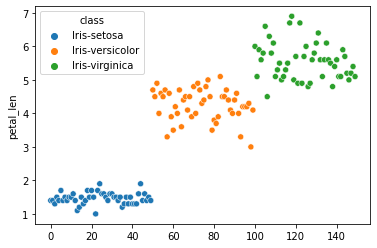

In [40]:
sns.scatterplot(df.index,df.petal_len,hue=df['class'])

###### explore petal_width

In [41]:
df.petal_width.dtype

dtype('float64')

In [42]:
df.petal_width.isnull().sum()

0

In [43]:
df.petal_width.is_unique

False

In [44]:
print('mean: ',np.mean(df.petal_width))
print('median: ',df.petal_width.median())
print('max: ',df.petal_width.max())
print('min: ',df.petal_width.min())
np.percentile(df.petal_width,[25,50,75])

mean:  1.1986666666666668
median:  1.3
max:  2.5
min:  0.1


array([0.3, 1.3, 1.8])

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

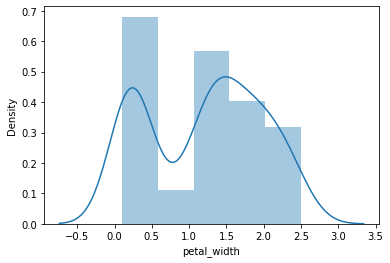

In [45]:
sns.distplot(df.petal_width)

In [46]:
a=np.log(df.petal_width)

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

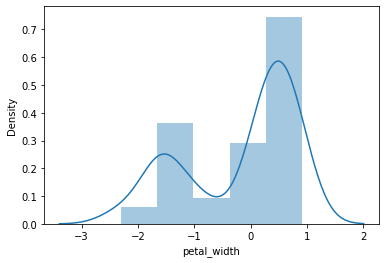

In [47]:
sns.distplot(a)

<AxesSubplot:xlabel='petal_width'>

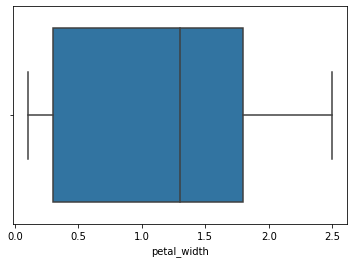

In [48]:
sns.boxplot(df.petal_width,)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8562e80430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8562e80b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8562e800a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8562e8c2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8562e8c9d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f8562e8c640>]}

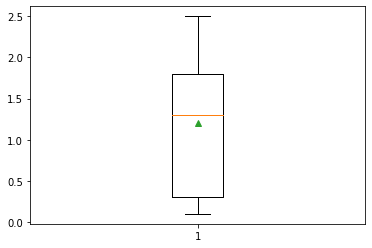

In [49]:
plt.boxplot(df.petal_width,showmeans=True,)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8562de50d0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f8562dd6f40>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8562de55b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8562de58e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8562de5c10>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f8562de5f40>}

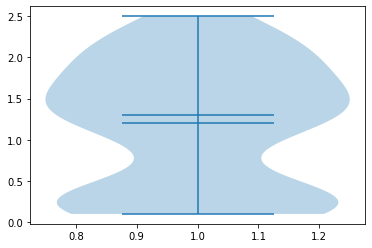

In [50]:
plt.violinplot(df.petal_width,showmeans=True,showmedians=True)

<AxesSubplot:xlabel='petal_width'>

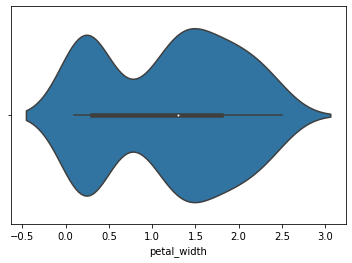

In [51]:
sns.violinplot(df.petal_width)

<AxesSubplot:xlabel='petal_width'>

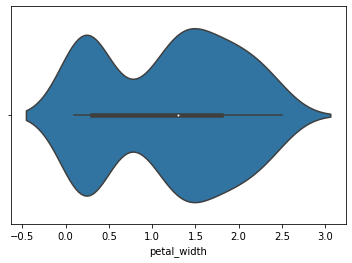

In [52]:
sns.violinplot(df.petal_width,hue=df['class'],)

<AxesSubplot:xlabel='class', ylabel='petal_width'>

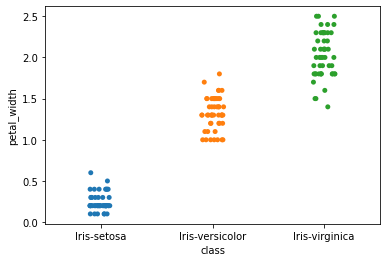

In [53]:
sns.stripplot(df['class'],df.petal_width)

<AxesSubplot:ylabel='petal_width'>

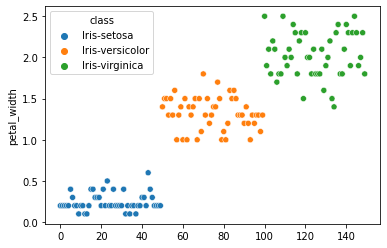

In [54]:
sns.scatterplot(df.index,df.petal_width,hue=df['class'])

###### explore class

In [55]:
df['class'].dtype

dtype('O')

In [56]:
df['class'].isnull().sum()

0

In [57]:
df['class'].is_unique

False

In [58]:
df['class'].nunique()

3

In [59]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [61]:
df['class'].value_counts(normalize=True)*100

Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: class, dtype: float64

<AxesSubplot:>

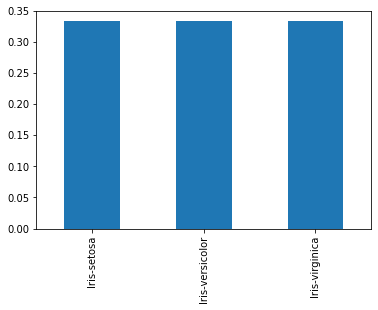

In [62]:
df['class'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='class', ylabel='count'>

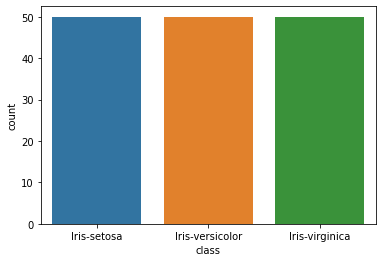

In [63]:
sns.countplot(df['class'])

([<matplotlib.patches.Wedge at 0x7f85628a4f40>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33')])

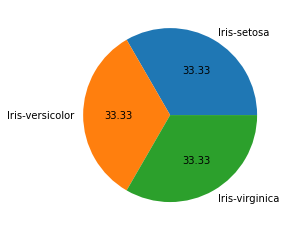

In [64]:
plt.pie(df['class'].value_counts(normalize=True),labels=df['class'].unique(),
       autopct='%.2f')

##### Bivariate Analysis

<AxesSubplot:xlabel='sepal_len', ylabel='class'>

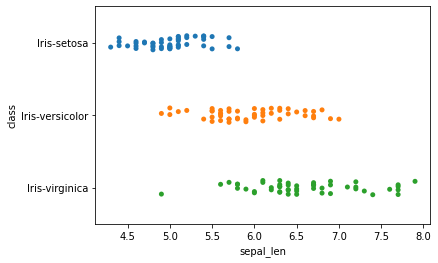

In [65]:
sns.stripplot(df.sepal_len,df['class'],orient='horizontal')

No handles with labels found to put in legend.


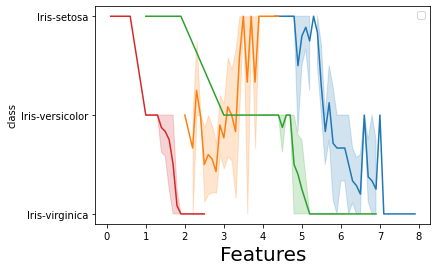

In [66]:
sns.lineplot(df.sepal_len,df['class'],legend='full')
sns.lineplot(df.sepal_width,df['class'],legend='full')
sns.lineplot(df.petal_len,df['class'])
sns.lineplot(df.petal_width,df['class'])
plt.xlabel('Features',fontdict=dict(fontsize=20))
plt.legend()

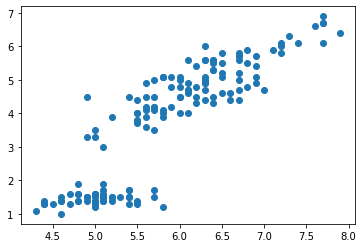

In [67]:
plt.scatter(df.sepal_len,df.petal_len)

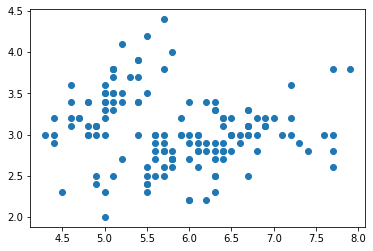

In [68]:
plt.scatter(df.sepal_len,df.sepal_width)

<AxesSubplot:xlabel='sepal_len', ylabel='sepal_width'>

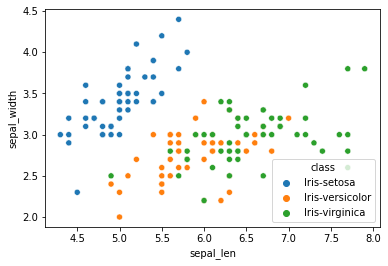

In [69]:
sns.scatterplot(df.sepal_len,df.sepal_width,hue=df['class'])

<AxesSubplot:xlabel='class', ylabel='petal_len'>

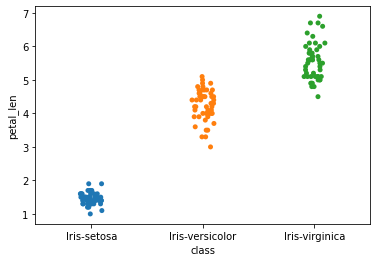

In [70]:
sns.stripplot(df['class'],df.petal_len)

##### Multivairate Analysis

<AxesSubplot:>

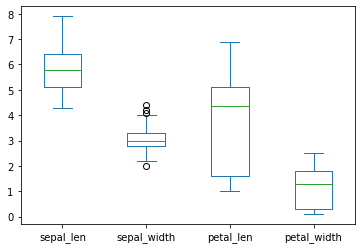

In [71]:
df.plot.box()

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'sepal_len'),
  Text(0, 1.5, 'sepal_width'),
  Text(0, 2.5, 'petal_len'),
  Text(0, 3.5, 'petal_width')])

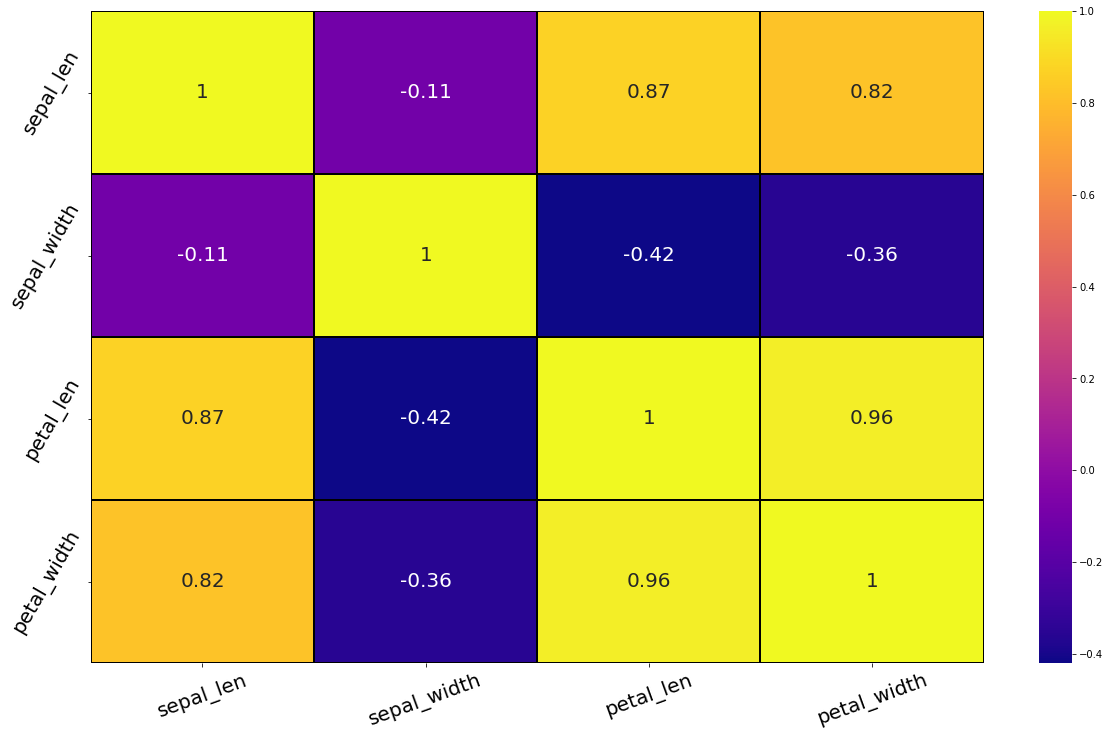

In [72]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,annot_kws=dict(size=20),linewidths=2,linecolor='black',cmap='plasma')
plt.xticks(rotation=20,fontsize=20)
plt.yticks(rotation=60,fontsize=20)
# numerical features

In [73]:
df.columns[:-1]

Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width'], dtype='object')

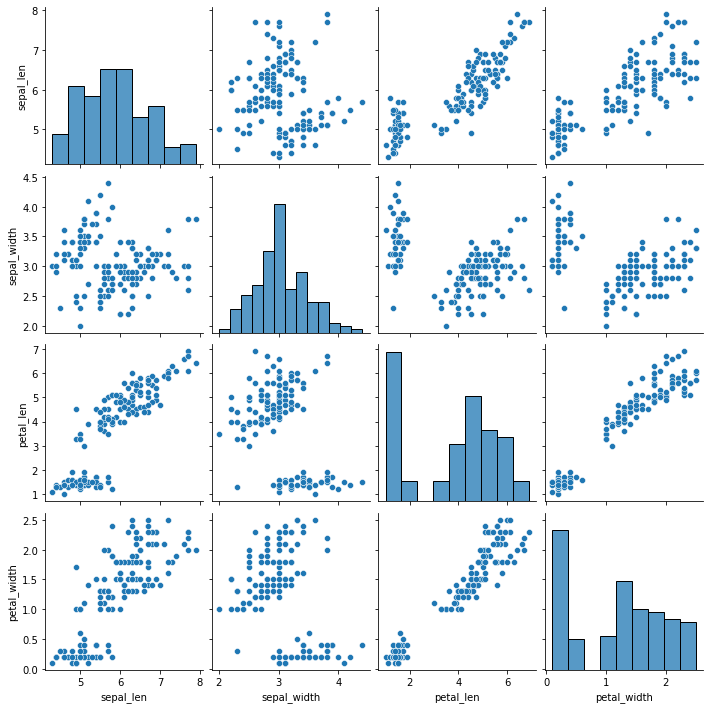

In [74]:
sns.pairplot(df)

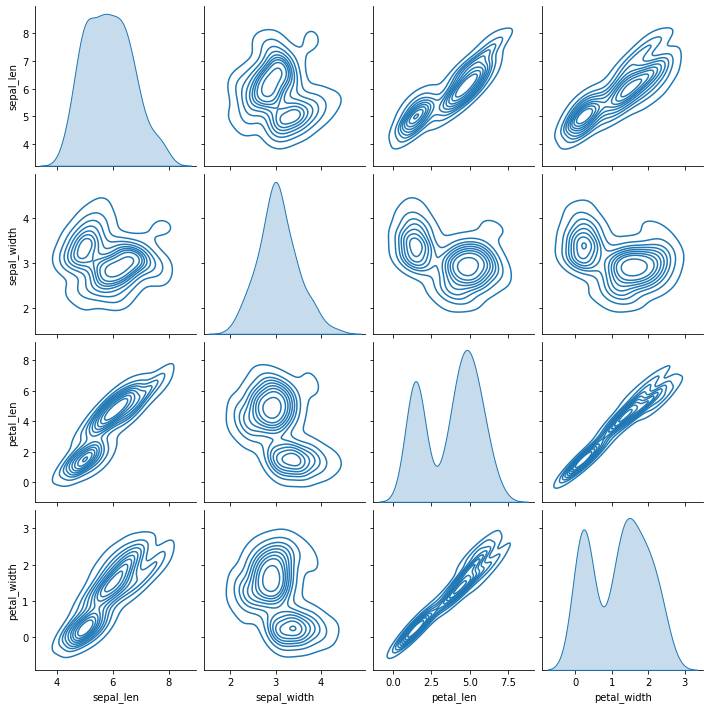

In [75]:
sns.pairplot(df,kind='kde',palette='black')

#### Feature Engineering

In [76]:
df.sample(10)

,sepal_len,sepal_width,petal_len,petal_width,class
22,4.6,3.6,1.0,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
69,5.6,2.5,3.9,1.1,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
13,4.3,3.0,1.1,0.1,Iris-setosa


<AxesSubplot:>

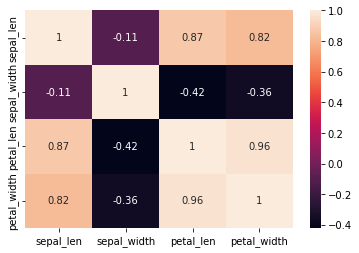

In [77]:
sns.heatmap(df.corr(),annot=True)
# this chart will show, the correlation bw features.
# using this we can analize,feature relation/

In [78]:
# our df.class feature is catergorical.so, for we need to convert catergorical featured into numerical feature
# bcuz ml model understand only num values.
y=df.iloc[:,-1]

In [79]:
y.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: class, dtype: object

In [80]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encode=OneHotEncoder()
le=LabelEncoder()


In [81]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [82]:
df['class'].nunique()

3

In [83]:
le.fit(df['class'])

LabelEncoder()

In [84]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
le.transform(df['class'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [87]:
df['class'].head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: class, dtype: object

In [88]:
df.head(2)

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [89]:
df['class']=le.fit_transform(df['class'])

In [90]:
df.head(2)

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [91]:
le.inverse_transform(df['class'].unique())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [92]:
# 0-Iris-setosa
# 1-Iris-versicolor
# 2-Iris-virginica

<AxesSubplot:>

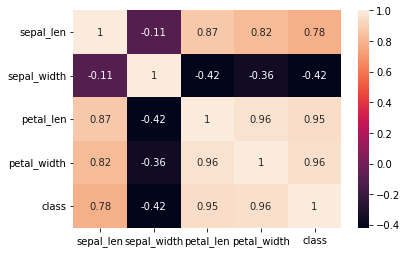

In [93]:
#  our data is well distributed. so, in that case we don't need scaling/Normalization
sns.heatmap(df.corr(),annot=True,annot_kws=dict(size=10))
# now it will show corr bw independent nd dependent features

In [94]:
# every independent feature has great corr() with dependent variable(targer var)
# exclude sepal_width

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # for classification
#  from sklearn.features_selecton import f_regression ----> for regression

In [96]:
select=SelectKBest(score_func=chi2,k=3)

In [97]:
df.iloc[:,:-1]

,sepal_len,sepal_width,petal_len,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [98]:
z=select.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])

In [99]:
print(df.shape)
print(z.shape)

(150, 5)
(150, 3)


In [100]:
df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
z

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [102]:
selected_fet=select.get_support()
features=np.array(df.columns)
features=features[:-1]
print("selected KBestFeatures: ")
print(features[selected_fet])

selected KBestFeatures: 
['sepal_len' 'petal_len' 'petal_width']


In [103]:
df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Modelling
### ML/DL algorithms
##### model building/cross validation/hyperparameter tunning/preprocessing

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [105]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.head())
print(y.head())

   sepal_len  sepal_width  petal_len  petal_width
0        5.1          3.5        1.4          0.2
1        4.9          3.0        1.4          0.2
2        4.7          3.2        1.3          0.2
3        4.6          3.1        1.5          0.2
4        5.0          3.6        1.4          0.2
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


#### Cross Validation

In [106]:
# without cross_validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=3)
knn=KNeighborsClassifier()

In [107]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
score=accuracy_score(pred,y_test)
score

0.9666666666666667

In [108]:
x_train.head()

,sepal_len,sepal_width,petal_len,petal_width
14,5.8,4.0,1.2,0.2
24,4.8,3.4,1.9,0.2
139,6.9,3.1,5.4,2.1
58,6.6,2.9,4.6,1.3
8,4.4,2.9,1.4,0.2


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=5)
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)
score2=accuracy_score(pred2,y_test)
score2

0.9333333333333333

In [110]:
x_train.head()

,sepal_len,sepal_width,petal_len,petal_width
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=8)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
score3=accuracy_score(pred3,y_test)
score3

0.9

In [112]:
# with cross validation
cv_score=cross_val_score(knn,x,y,cv=5)
cv_score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [113]:
cv_score.mean()

0.9733333333333334

In [114]:
from sklearn.model_selection import KFold
tree=DecisionTreeClassifier()
kfold=KFold(n_splits=5,random_state=3,shuffle=True)
cv_score=cross_val_score(tree,x,y,cv=kfold,)

In [115]:
cv_score

array([0.96666667, 0.93333333, 0.93333333, 1.        , 0.9       ])

In [116]:
kfold=KFold(n_splits=10,random_state=14,shuffle=True)
cross_val_score(tree,x,y,cv=kfold,)


array([0.93333333, 1.        , 0.93333333, 1.        , 0.66666667,
       1.        , 0.93333333, 0.93333333, 1.        , 0.93333333])

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,
                                              test_size=.1)
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
accuracy_score(pred,y_test)

0.9333333333333333

In [118]:
cv_score.mean()

0.9466666666666667

#### Hyperparameter Tunning using GridSearchCV 
###### we can use cv in GridSeachCV. so, we don't need to specify cv instantly.

In [119]:
#  we are going to use knn into tunning
knn=KNeighborsClassifier()
kfold=KFold(n_splits=8,random_state=4,shuffle=True)
params=dict(n_neighbors=list(range(3,20,2)))
Grid_model=GridSearchCV(knn,params,scoring='accuracy',cv=kfold)


In [120]:
from sklearn.metrics import SCORERS
SCORERS.keys() 
# valid scoring parametrs for cv/hyperparameter tunning

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [121]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [122]:
Grid_model.fit(x,y)

GridSearchCV(cv=KFold(n_splits=8, random_state=4, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [123]:
Grid_model.best_params_

{'n_neighbors': 15}

In [124]:
Grid_model.best_score_

0.9802631578947368

In [125]:
Grid_model.cv_results_

{'mean_fit_time': array([0.00774014, 0.00341296, 0.00232309, 0.0018734 , 0.00181365,
        0.00176361, 0.00176576, 0.00173557, 0.00178504]),
 'std_fit_time': array([2.82756228e-03, 1.29148200e-03, 7.36319361e-04, 3.53375404e-04,
        6.02291519e-04, 6.25808394e-05, 6.85117927e-05, 8.44825562e-05,
        9.89759490e-05]),
 'mean_score_time': array([0.00825587, 0.00378075, 0.00240505, 0.00224194, 0.00205407,
        0.00224733, 0.00217149, 0.00216249, 0.00220084]),
 'std_score_time': array([2.32380588e-03, 1.22918781e-03, 2.60084237e-04, 3.62134786e-04,
        2.58753366e-04, 5.28046022e-05, 6.31177377e-05, 1.13839032e-04,
        1.57705645e-04]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neig

In [126]:
Grid_model.cv

KFold(n_splits=8, random_state=4, shuffle=True)

In [127]:
Grid_model.n_splits_

8

In [128]:
# we have acheived best parameters. n_neighbors=15

In [129]:
# let's build model using this parameters
knn=KNeighborsClassifier(n_neighbors=15)
kfold=KFold(n_splits=8,random_state=4,shuffle=True)
cv=cross_val_score(knn,x,y,cv=kfold,scoring='accuracy')

In [130]:
cv

array([0.94736842, 1.        , 1.        , 0.89473684, 1.        ,
       1.        , 1.        , 1.        ])

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.2)

In [132]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [133]:
pred=knn.predict(x_test)

In [134]:
score=accuracy_score(pred,y_test)

In [135]:
score

0.9666666666666667

In [136]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'uniform'}

In [137]:
# so, this is our model with best_params_

In [138]:
tree=ExtraTreesClassifier()

In [139]:
tree.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

### Pipeline

In [140]:
from sklearn.preprocessing import StandardScaler
pipe=Pipeline([('scaler',StandardScaler()),
              ('knn',KNeighborsClassifier())])
pipe=pipe.fit(x_train,y_train)


In [141]:
y_pred=pipe.predict(x_test)

In [142]:
y_pred.shape

(30,)

In [143]:
y_test.shape

(30,)

In [144]:
y_train.shape

(120,)

In [145]:
accuracy_score(y_pred,y_test)

0.9

In [146]:
params=dict(knn__n_neighbors=list(range(3,20,2)),knn__p=[1,2],knn__weights=['uniform','distance'])
gridsearch=GridSearchCV(pipe,params,verbose=True)
# when we do tunning for pipeline then follow name of the pipeline step
# followed by __ nd then finally name of parameter within this step
# ----------------
# but if when we do tunning for only model then there is no need to 
# follow this naming convention

In [147]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)

In [148]:
gridsearch.best_params_

{'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}

In [149]:
gridsearch.best_score_

0.9833333333333332

In [150]:
knn=KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform')

In [151]:
pipe=Pipeline([('scaler',StandardScaler()),
              ('knn',knn)])
pipe=pipe.fit(x_train,y_train)


In [152]:
predict=pipe.predict(x_test)

In [153]:
accuracy_score(predict,y_test)

0.9333333333333333

In [154]:
pipe2=Pipeline([('knn',knn)])
pipe2=pipe2.fit(x_train,y_train)

In [155]:
predict2=pipe2.predict(x_test)

In [156]:
accuracy_score(predict2,y_test)

0.9666666666666667

In [157]:
from sklearn.preprocessing import MinMaxScaler
pipe=Pipeline([('scaler',MinMaxScaler()),
              ('knn',KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform'))])
pipe=pipe.fit(x_train,y_train)

In [158]:
pred=pipe.predict(x_test)

In [159]:
accuracy_score(pred,y_test)

0.9333333333333333